# CatBoost Model

## Step 1: Import packages and set working directory

In [ ]:
# Import packages
import optuna
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import catboost as cb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Optional Code: Here's a format for setting working directory, change as needed
import os
# os.chdir('/path/to/the/project')
os.chdir('/Users/zihanji/Desktop/DS340W')

## Step 2: Load the final cleaned data

In [3]:
data_final = pd.read_csv('./project/volume/data/processed/data_final.csv')

## Step 3: Building the CatBoost model

In [4]:
# Split the data to features and result
x = data_final.drop('SalePrice', axis = 1)
y = data_final['SalePrice']

In [5]:
# Split the data to train and test, with test size being 20% of the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [6]:
# Fit the model to built a prediction for x test
CatBoost = cb.CatBoostRegressor()
CatBoost.fit(x_train, y_train)
CatBoost_pred = CatBoost.predict(x_test)

Learning rate set to 0.046842
0:	learn: 0.3885039	total: 60.4ms	remaining: 1m
1:	learn: 0.3768588	total: 62.5ms	remaining: 31.2s
2:	learn: 0.3654295	total: 64.7ms	remaining: 21.5s
3:	learn: 0.3541678	total: 67.1ms	remaining: 16.7s
4:	learn: 0.3441996	total: 69.3ms	remaining: 13.8s
5:	learn: 0.3342699	total: 71.4ms	remaining: 11.8s
6:	learn: 0.3249641	total: 73.5ms	remaining: 10.4s
7:	learn: 0.3164636	total: 75.7ms	remaining: 9.38s
8:	learn: 0.3087653	total: 77.9ms	remaining: 8.57s
9:	learn: 0.3004461	total: 79.8ms	remaining: 7.9s
10:	learn: 0.2925048	total: 82ms	remaining: 7.37s
11:	learn: 0.2847234	total: 84.2ms	remaining: 6.93s
12:	learn: 0.2774849	total: 86.3ms	remaining: 6.55s
13:	learn: 0.2704139	total: 88.4ms	remaining: 6.22s
14:	learn: 0.2639786	total: 90.6ms	remaining: 5.95s
15:	learn: 0.2576991	total: 92.9ms	remaining: 5.71s
16:	learn: 0.2515154	total: 95.1ms	remaining: 5.5s
17:	learn: 0.2459823	total: 97.3ms	remaining: 5.3s
18:	learn: 0.2408956	total: 99.5ms	remaining: 5.14s


## Step 4: Check for scores

In [7]:
# Check for the score of the prediction
CatBoost_score = CatBoost.score(x_train, y_train)
print('CatBoost Model Score: ', round(CatBoost_score, 3))

# R squared value
r2 = r2_score(y_test, CatBoost_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, CatBoost_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, CatBoost_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(CatBoost, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

CatBoost Model Score:  0.986
R Squared:  0.949
Adjusted R Squared:  0.943
Mean Squared Error:  0.009
Root Mean Squared Error:  0.097
Mean Absolute Error:  0.068
Learning rate set to 0.046842
0:	learn: 0.3892158	total: 3.67ms	remaining: 3.67s
1:	learn: 0.3770669	total: 6.09ms	remaining: 3.04s
2:	learn: 0.3666690	total: 8.62ms	remaining: 2.87s
3:	learn: 0.3550400	total: 10.9ms	remaining: 2.72s
4:	learn: 0.3454267	total: 13.4ms	remaining: 2.67s
5:	learn: 0.3357538	total: 16ms	remaining: 2.64s
6:	learn: 0.3259164	total: 18.3ms	remaining: 2.6s
7:	learn: 0.3174759	total: 20.7ms	remaining: 2.57s
8:	learn: 0.3089239	total: 23.1ms	remaining: 2.55s
9:	learn: 0.3006219	total: 26ms	remaining: 2.57s
10:	learn: 0.2925317	total: 28.7ms	remaining: 2.58s
11:	learn: 0.2849642	total: 31.2ms	remaining: 2.57s
12:	learn: 0.2774765	total: 33.7ms	remaining: 2.56s
13:	learn: 0.2698954	total: 36.2ms	remaining: 2.55s
14:	learn: 0.2629884	total: 38.5ms	remaining: 2.53s
15:	learn: 0.2564537	total: 41ms	remaining: 

## Step 5: Create visuals

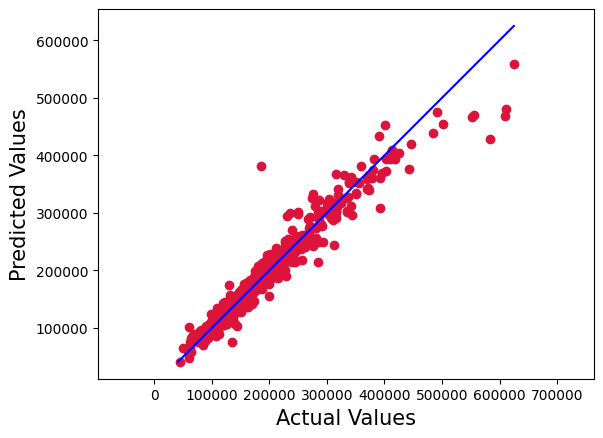

In [8]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(CatBoost_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

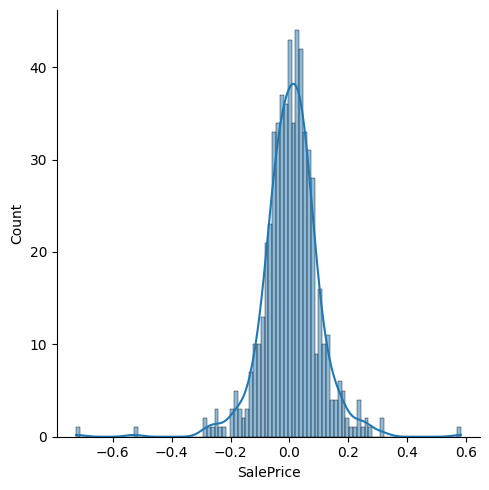

In [9]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - CatBoost_pred), bins = 100, kde = True)

## Step 6: Hyperparameter tuning (optuna)

In [10]:
def objective(trial):
    # Define hyperparameter search space
    parameters = {'iterations': trial.suggest_int('iterations', 100, 500),
                  'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
                  'depth': trial.suggest_int('depth', 1, 10),
                  'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
                  'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.05, 1.0),
                  'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 100)}
    # Train catboost model
    model = cb.CatBoostRegressor(**parameters)
    model.fit(x_train, y_train, eval_set = [(x_test, y_test)], verbose = False)
    # Evaluate model
    predict = model.predict(x_test)
    mse = mean_squared_error(y_test, predict)
    rmse = np.sqrt(mse)
    return rmse

In [11]:
# Run optuna optimization
study = optuna.create_study(direction = 'minimize')  # Minimize RMSE
study.optimize(objective, n_trials = 50)

# Print best hyperparameters
print('Best RMSE: ', study.best_value)
print('Best Hyperparameters: ', study.best_params)

[I 2025-04-06 14:40:16,746] A new study created in memory with name: no-name-b7b81b1e-2350-43d6-9390-97dd5a024d6e
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_74971/2799082157.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.05, 1.0),
/var/folders/bc/6ybxr1xs1f98kjg2pl98nqlc0000gn/T/ipykernel_74971/2799082157.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel': trial.suggest_uniform('colsample_bylevel', 0.05, 1.0),
[I 2025-04-06 14:40:17,212] Trial 0 finished with value: 0.11745640464637537 and parameters: {'iterations': 108, 'learning_rate': 0.05810418913072957, 'depth': 8, 'subsample': 0.6771276310383005, 'colsample_b

Best RMSE:  0.09864490848979787
Best Hyperparameters:  {'iterations': 429, 'learning_rate': 0.09935259491982779, 'depth': 6, 'subsample': 0.6629907973082906, 'colsample_bylevel': 0.5754189988002516, 'min_data_in_leaf': 95}


In [13]:
# Built a CatBoost model with the new hyperparameter option
# {'iterations': 456, 'learning_rate': 0.0872036423091732, 'depth': 4, 'subsample': 0.39961384554281254, 
# 'colsample_bylevel': 0.4591663924419716, 'min_data_in_leaf': 96}
cb_mod = cb.CatBoostRegressor(iterations = 456, learning_rate = 0.0872036423091732, depth = 4, 
                              subsample = 0.39961384554281254, colsample_bylevel = 0.4591663924419716, 
                              min_data_in_leaf = 96)
cb_mod.fit(x_train, y_train)
cb_pred = cb_mod.predict(x_test)

0:	learn: 0.3793808	total: 1.57ms	remaining: 713ms
1:	learn: 0.3611886	total: 4.05ms	remaining: 919ms
2:	learn: 0.3426222	total: 5.45ms	remaining: 823ms
3:	learn: 0.3271086	total: 6.69ms	remaining: 756ms
4:	learn: 0.3121921	total: 7.91ms	remaining: 713ms
5:	learn: 0.2987176	total: 9.15ms	remaining: 687ms
6:	learn: 0.2868360	total: 10.7ms	remaining: 686ms
7:	learn: 0.2744797	total: 11.9ms	remaining: 669ms
8:	learn: 0.2643416	total: 13.2ms	remaining: 657ms
9:	learn: 0.2546113	total: 14.6ms	remaining: 653ms
10:	learn: 0.2453695	total: 15.8ms	remaining: 640ms
11:	learn: 0.2362443	total: 17ms	remaining: 631ms
12:	learn: 0.2291001	total: 18.2ms	remaining: 619ms
13:	learn: 0.2221121	total: 19.2ms	remaining: 608ms
14:	learn: 0.2149299	total: 20.5ms	remaining: 603ms
15:	learn: 0.2082516	total: 21.6ms	remaining: 594ms
16:	learn: 0.2025021	total: 22.7ms	remaining: 586ms
17:	learn: 0.1981211	total: 23.7ms	remaining: 578ms
18:	learn: 0.1930815	total: 24.9ms	remaining: 572ms
19:	learn: 0.1883219	tot

## Step 7: Check for scores

In [14]:
# Check for the score of the prediction
cb_mod_score = cb_mod.score(x_train, y_train)
print('CatBoost Model Score: ', round(cb_mod_score, 3))

# R squared value
r2 = r2_score(y_test, CatBoost_pred)
print('R Squared: ', round(r2, 3))

# Adjusted R squared value
adj_r2 = 1 - (1 - r2) * (len(y) - 1) / (len(y) - x.shape[1] - 1)
print('Adjusted R Squared: ', round(adj_r2, 3))

# Mean squared error
mean_sq = mean_squared_error(y_test, CatBoost_pred)
print('Mean Squared Error: ', round(mean_sq, 3))

# Root mean squared error
root_mean_sq = np.sqrt(mean_sq)
print('Root Mean Squared Error: ', round(root_mean_sq, 3))

# Mean absolute error
mean_ab = mean_absolute_error(y_test, CatBoost_pred)
print('Mean Absolute Error: ', round(mean_ab, 3))

# Cross validation (or accuracy)
cv = cross_val_score(cb_mod, x, y, scoring = 'r2', cv = 5)
print('Accuracy: ', round(cv.mean() * 100, 3), '%')

CatBoost Model Score:  0.963
R Squared:  0.949
Adjusted R Squared:  0.943
Mean Squared Error:  0.009
Root Mean Squared Error:  0.097
Mean Absolute Error:  0.068
0:	learn: 0.3795588	total: 1ms	remaining: 456ms
1:	learn: 0.3592024	total: 1.98ms	remaining: 448ms
2:	learn: 0.3408994	total: 2.93ms	remaining: 443ms
3:	learn: 0.3245700	total: 3.88ms	remaining: 439ms
4:	learn: 0.3109738	total: 4.82ms	remaining: 435ms
5:	learn: 0.2978979	total: 5.69ms	remaining: 427ms
6:	learn: 0.2857860	total: 6.54ms	remaining: 420ms
7:	learn: 0.2741734	total: 7.62ms	remaining: 427ms
8:	learn: 0.2614454	total: 8.55ms	remaining: 425ms
9:	learn: 0.2510541	total: 9.46ms	remaining: 422ms
10:	learn: 0.2437579	total: 10.4ms	remaining: 420ms
11:	learn: 0.2347961	total: 11.4ms	remaining: 420ms
12:	learn: 0.2261618	total: 12.4ms	remaining: 424ms
13:	learn: 0.2185985	total: 13.5ms	remaining: 426ms
14:	learn: 0.2113357	total: 14.6ms	remaining: 430ms
15:	learn: 0.2052327	total: 16.1ms	remaining: 442ms
16:	learn: 0.1993571

## Step 8: Create visuals

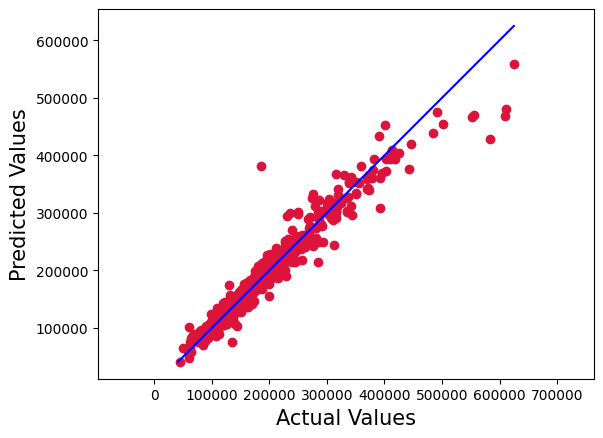

In [15]:
actual_price = np.expm1(y_test)
predicted_price = np.expm1(CatBoost_pred)

# Create a scatter plot
plt.scatter(actual_price, predicted_price, c = 'crimson')

# Draw the line of perfect prediction (where actual = predicted)
p1 = max(max(predicted_price), max(actual_price))
p2 = min(min(predicted_price), min(actual_price))
plt.plot([p1, p2], [p1, p2], 'b-')

# Add labels
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Values', fontsize = 15)

# Make sure the axes are scaled equally
plt.axis('equal')

plt.show()

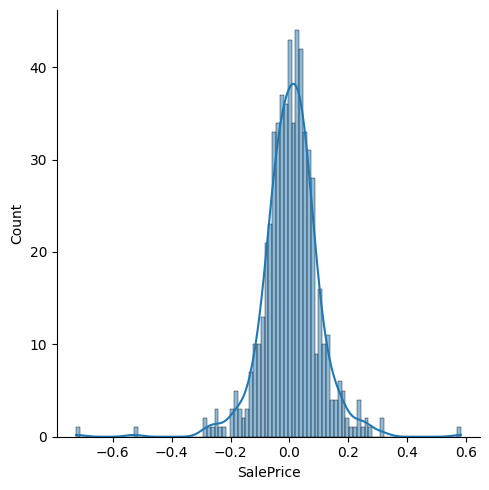

In [16]:
# Distribution of residuals (difference between actual and predicted value)
sb.displot((y_test - CatBoost_pred), bins = 100, kde = True)

## Step 9: Check feature important

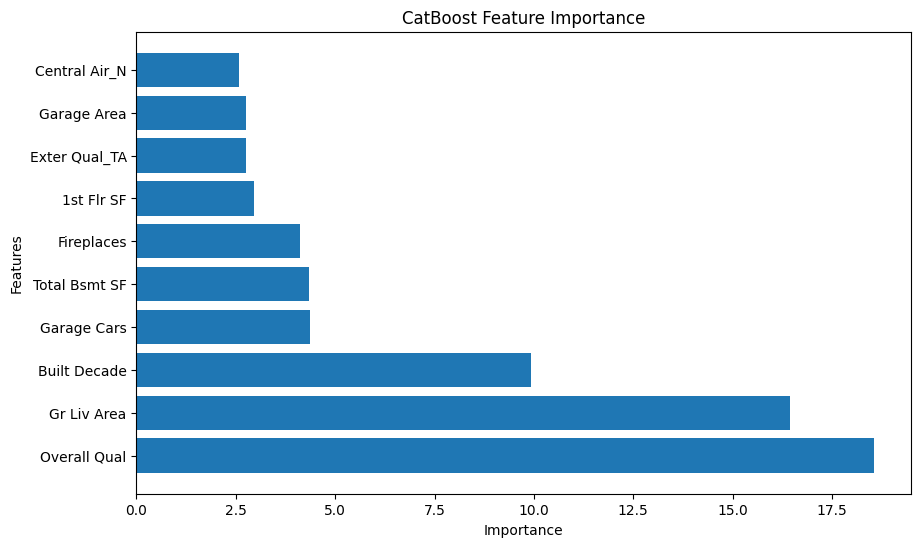

In [17]:
importances = cb_mod.get_feature_importance(type = 'PredictionValuesChange')
feature_importances = pd.Series(importances, index = x.columns).sort_values(ascending = False)[:10]
plt.figure(figsize = (10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()